In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Edit Parameter default matplotlib
from matplotlib import rcParams
rcParams["figure.figsize"] = (12, 6)
rcParams["lines.linewidth"] = 3
rcParams["xtick.labelsize"] = "x-large"
rcParams["ytick.labelsize"] = "x-large"

In [3]:
# Read dataset
df = pd.read_csv("botak.csv")
df.shape

# (rows, columns)

(7917, 14)

In [4]:
df = pd.read_csv("botak.csv").sample(1000)
df.shape

(1000, 14)

In [5]:
df.sample(10)

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
7221,37.0,Laki-laki,Pegawai swasta,Palembang,1.483564e+07,1.0,1.0,58.692708,160.209940,Moonsilk,1.0,S1,7.0,0.743065
5182,39.0,Laki-laki,Pegawai swasta,Denpasar,2.875175e+06,1.0,0.0,81.396443,171.448400,Pantone,1.0,SMA,4.0,0.446335
4360,27.0,Perempuan,PNS,Palangkaraya,4.320774e+06,1.0,1.0,57.543101,171.576165,Merpati,0.0,S1,9.0,0.617592
7667,50.0,Laki-laki,PNS,Pekanbaru,4.872575e+06,1.0,1.0,48.246866,158.283846,Pantone,0.0,S1,8.0,0.822014
746,37.0,Perempuan,Pegawai swasta,Banda Lampung,4.924982e+06,1.0,0.0,57.892670,163.547766,Deadbuoy,1.0,SMA,7.0,0.389894
6207,30.0,Laki-laki,PNS,Mataram,9.719000e+06,1.0,1.0,59.507251,184.773056,Merpati,0.0,S1,8.0,0.818014
4863,42.0,Laki-laki,Freelance,Tanjung Pinang,7.703479e+06,1.0,0.0,48.022685,145.225799,Pantone,0.0,S1,8.0,0.498639
5787,NaN,Perempuan,Freelance,Bandung,7.669632e+06,1.0,0.0,62.315534,165.225650,Pantone,1.0,S2,4.0,0.320390
4996,34.0,Laki-laki,PNS,Surabaya,6.437830e+06,1.0,0.0,65.373328,171.281541,Moonsilk,0.0,S1,9.0,0.578515
4601,39.0,Laki-laki,PNS,Medan,7.381443e+06,1.0,0.0,73.359527,171.445848,Pantone,1.0,SMA,8.0,0.676695


In [6]:
df.info() # Column 0-12 = predictor/features; Column 13 = target

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 6640 to 7673
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           992 non-null    float64
 1   jenis_kelamin  993 non-null    object 
 2   pekerjaan      983 non-null    object 
 3   provinsi       990 non-null    object 
 4   gaji           993 non-null    float64
 5   is_menikah     994 non-null    float64
 6   is_keturunan   992 non-null    float64
 7   berat          990 non-null    float64
 8   tinggi         990 non-null    float64
 9   sampo          991 non-null    object 
 10  is_merokok     988 non-null    float64
 11  pendidikan     992 non-null    object 
 12  stress         991 non-null    float64
 13  botak_prob     989 non-null    float64
dtypes: float64(9), object(5)
memory usage: 117.2+ KB


In [7]:
df.isna().sum()

umur              8
jenis_kelamin     7
pekerjaan        17
provinsi         10
gaji              7
is_menikah        6
is_keturunan      8
berat            10
tinggi           10
sampo             9
is_merokok       12
pendidikan        8
stress            9
botak_prob       11
dtype: int64

In [8]:
df.describe()

,umur,gaji,is_menikah,is_keturunan,berat,tinggi,is_merokok,stress,botak_prob
count,992.000000,9.930000e+02,994.000000,992.000000,990.000000,990.000000,988.000000,991.000000,989.000000
mean,39.485887,8.867912e+06,0.979879,0.209677,56.316866,167.896798,0.535425,5.497477,0.582845
std,10.094698,4.462368e+06,0.140484,0.407284,10.294153,11.431134,0.498996,2.823377,0.170366
min,-1.000000,1.706443e+06,0.000000,0.000000,41.106808,133.552730,0.000000,1.000000,0.131580
25%,33.000000,5.704707e+06,1.000000,0.000000,49.483081,160.375620,0.000000,3.000000,0.459902
50%,40.000000,7.923508e+06,1.000000,0.000000,54.028207,167.751440,1.000000,5.000000,0.576867
75%,47.000000,1.092262e+07,1.000000,0.000000,60.783067,175.533031,1.000000,8.000000,0.696282
max,74.000000,4.352680e+07,1.000000,1.000000,150.000000,226.454577,1.000000,10.000000,1.000000


In [9]:
cat = ["jenis_kelamin", "pekerjaan", "provinsi", "sampo", "pendidikan"] # categorical data
num = ["umur", "gaji", "is_keturunan", "is_menikah", "berat", "tinggi", "is_merokok", "stress", "botak_prob"] #numerical data

In [10]:
df[num].describe()
# if mean ~~ median(50%) OR ~~ mode = Normal Distribution = Good Data
# double tilde sign (~~) (near)
# umur, tinggi, stress, botak_prob = normal distribution

,umur,gaji,is_keturunan,is_menikah,berat,tinggi,is_merokok,stress,botak_prob
count,992.000000,9.930000e+02,992.000000,994.000000,990.000000,990.000000,988.000000,991.000000,989.000000
mean,39.485887,8.867912e+06,0.209677,0.979879,56.316866,167.896798,0.535425,5.497477,0.582845
std,10.094698,4.462368e+06,0.407284,0.140484,10.294153,11.431134,0.498996,2.823377,0.170366
min,-1.000000,1.706443e+06,0.000000,0.000000,41.106808,133.552730,0.000000,1.000000,0.131580
25%,33.000000,5.704707e+06,0.000000,1.000000,49.483081,160.375620,0.000000,3.000000,0.459902
50%,40.000000,7.923508e+06,0.000000,1.000000,54.028207,167.751440,1.000000,5.000000,0.576867
75%,47.000000,1.092262e+07,0.000000,1.000000,60.783067,175.533031,1.000000,8.000000,0.696282
max,74.000000,4.352680e+07,1.000000,1.000000,150.000000,226.454577,1.000000,10.000000,1.000000


In [11]:
# if the min probability is minus, there is something wrong with the probability. 

In [12]:
df[cat].describe() #unique = total type; top = mode; freq = mode frequency

,jenis_kelamin,pekerjaan,provinsi,sampo,pendidikan
count,993,983,990,991,992
unique,2,4,34,5,6
top,Laki-laki,PNS,Mamuju,Deadbuoy,S1
freq,666,412,38,215,506


In [13]:
# if the total unique is high, the column will becomes useless for predict. Because, it will lower the accuracy. In the example above, provinsi is useless

In [14]:
# value counting
for col in cat:
    print(f'''value count column {col} :''')
    print(df[col].value_counts())
    print()

value count column jenis_kelamin :
jenis_kelamin
Laki-laki    666
Perempuan    327
Name: count, dtype: int64

value count column pekerjaan :
pekerjaan
PNS               412
Pegawai swasta    396
Freelance         137
Pengangguran       38
Name: count, dtype: int64

value count column provinsi :
provinsi
Mamuju            38
Tanjungselor      37
Denpasar          36
Banda Lampung     35
Manado            35
Pekanbaru         33
Gorontalo         32
Jakarta           32
Tanjung Pinang    31
Pontianak         31
Palu              31
Jambi             31
Pangkalpinang     31
Sofifi            30
Padang            30
Makassar          30
Kupang            29
Manokwari         28
Serang            28
Samarinda         28
Ambon             28
Mataram           28
Surabaya          27
Bandung           26
Jayapura          26
Palangkaraya      26
Banjarmasin       25
Palembang         25
Kendari           25
Bengkulu          25
Semarang          24
Yogyakarta        24
Medan             23
Ba

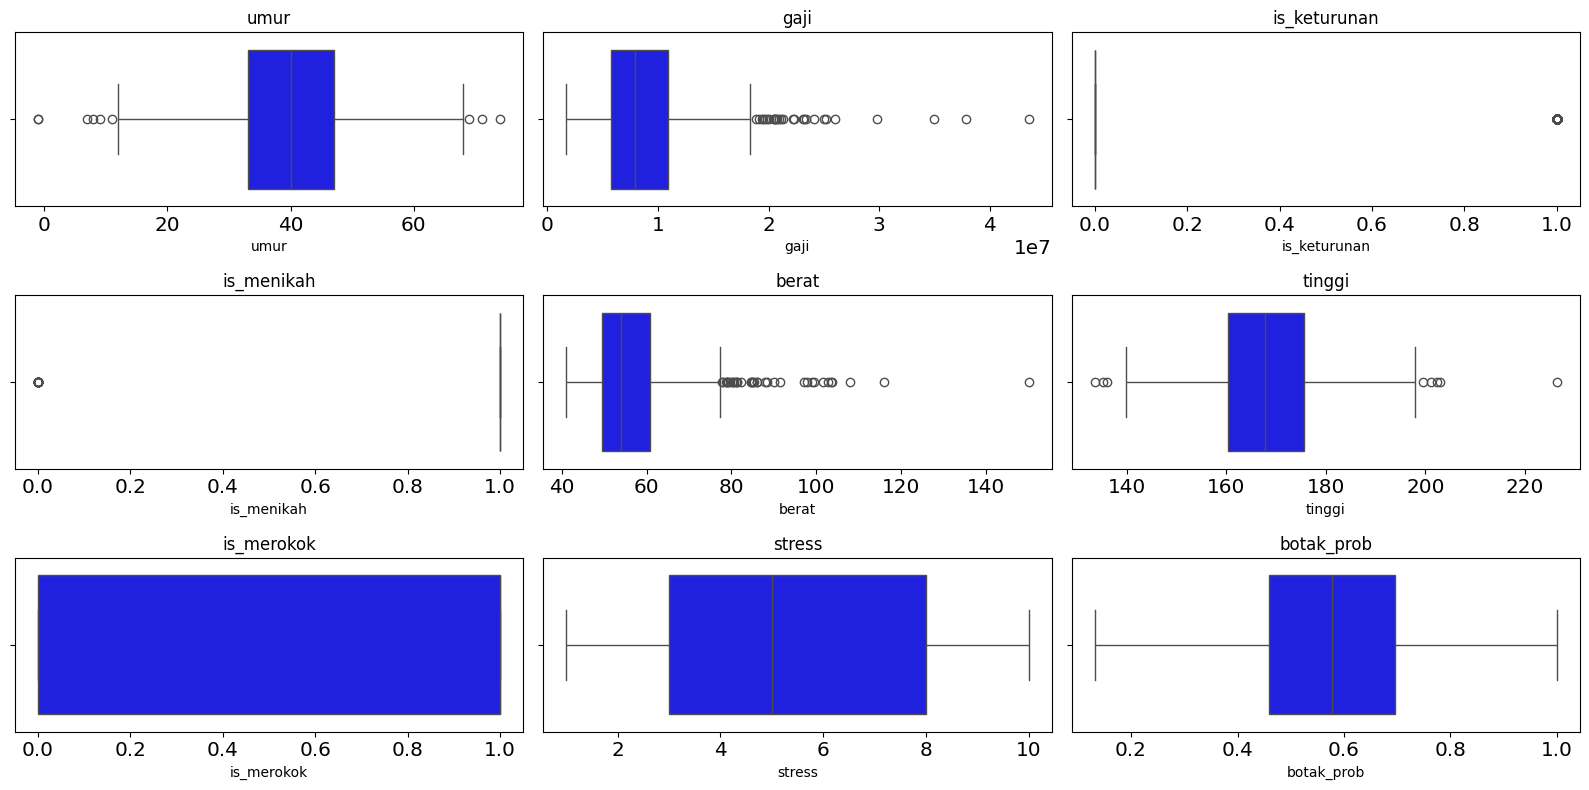

In [15]:
# univariate analysis
# boxplot
plt.figure(figsize=(16, 8))

for i, col in enumerate(num):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col], color="blue")
    plt.title(col)

plt.tight_layout()
plt.show()

In [16]:
# dots = outliers
# is_keturunan and is_merokok doesn't have outlier because there are only 2 values
# is_merokok values is balanced (50/50)
# gaji and berat graphs is skewed to the right (positive skewed), because the outliers going to the right direction
# graph is skewed to the left (negative skewed), because the outliers going to the left direction

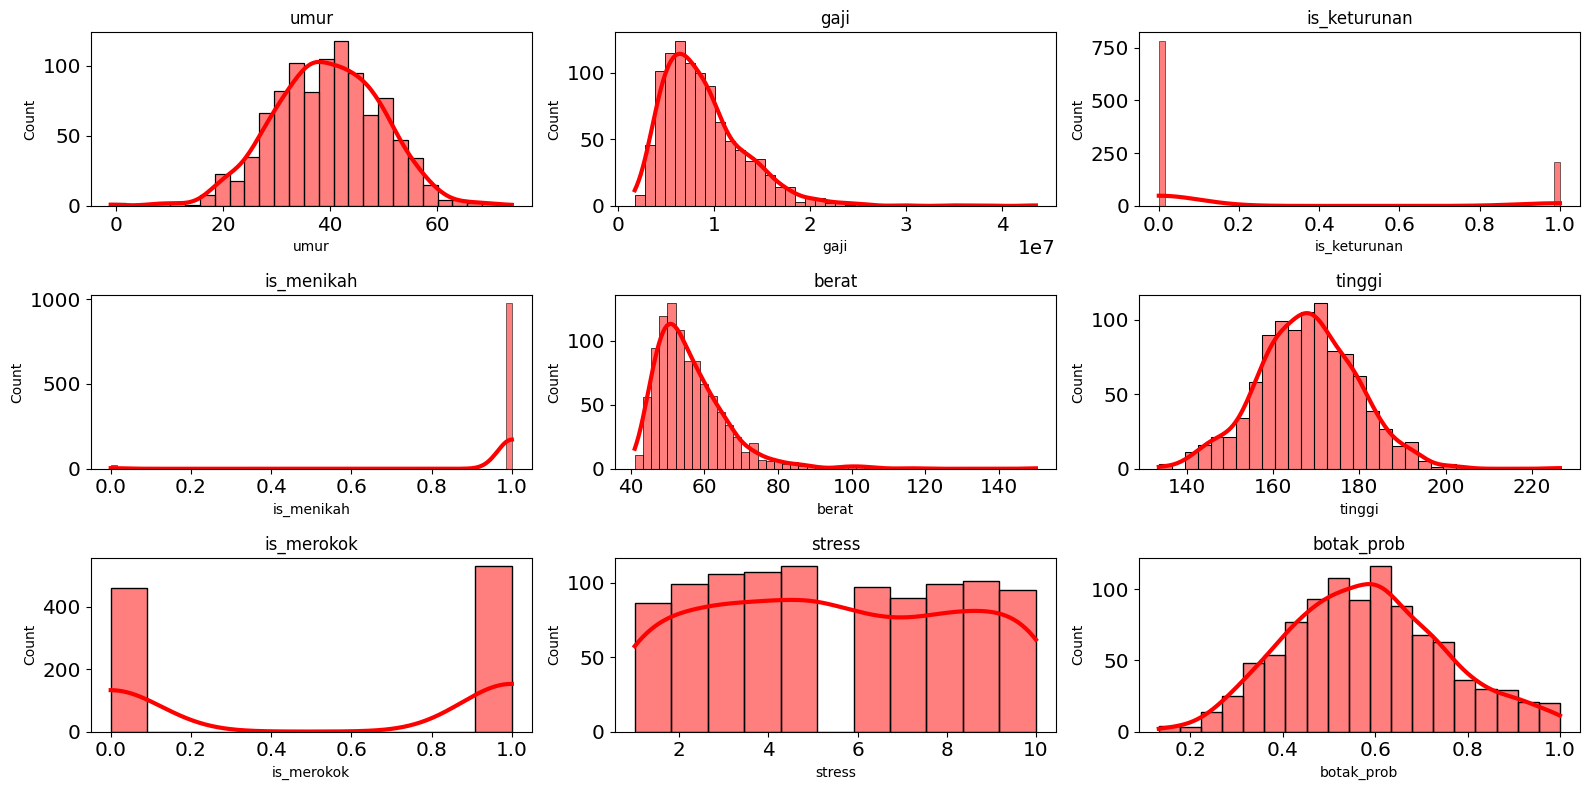

In [17]:
# hist plot
# if umur ~~ normal dist., fill the umur missing data with mean
# if gaji = skewed, fill the gaji missing data with median (50%)
plt.figure(figsize=(16, 8))

for i, col in enumerate(num):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df, x=col, kde=True, color="red")
    plt.title(col)

plt.tight_layout()
plt.show()

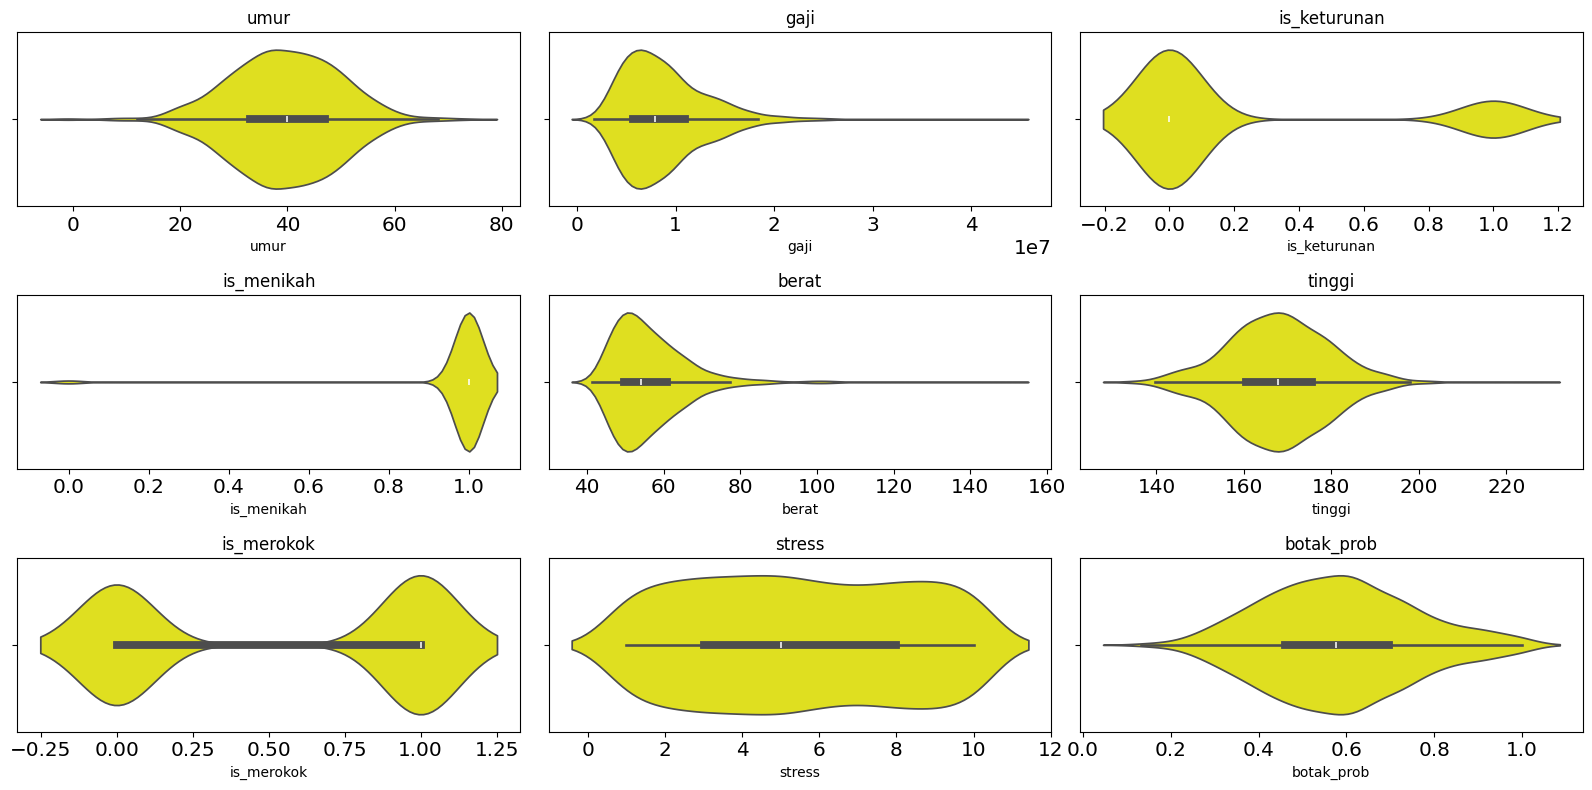

In [18]:
# violin plot (optional) = boxplot + histplot
plt.figure(figsize=(16, 8))

for i, col in enumerate(num):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(x=df[col], color="yellow")
    plt.title(col)

plt.tight_layout()
plt.show()

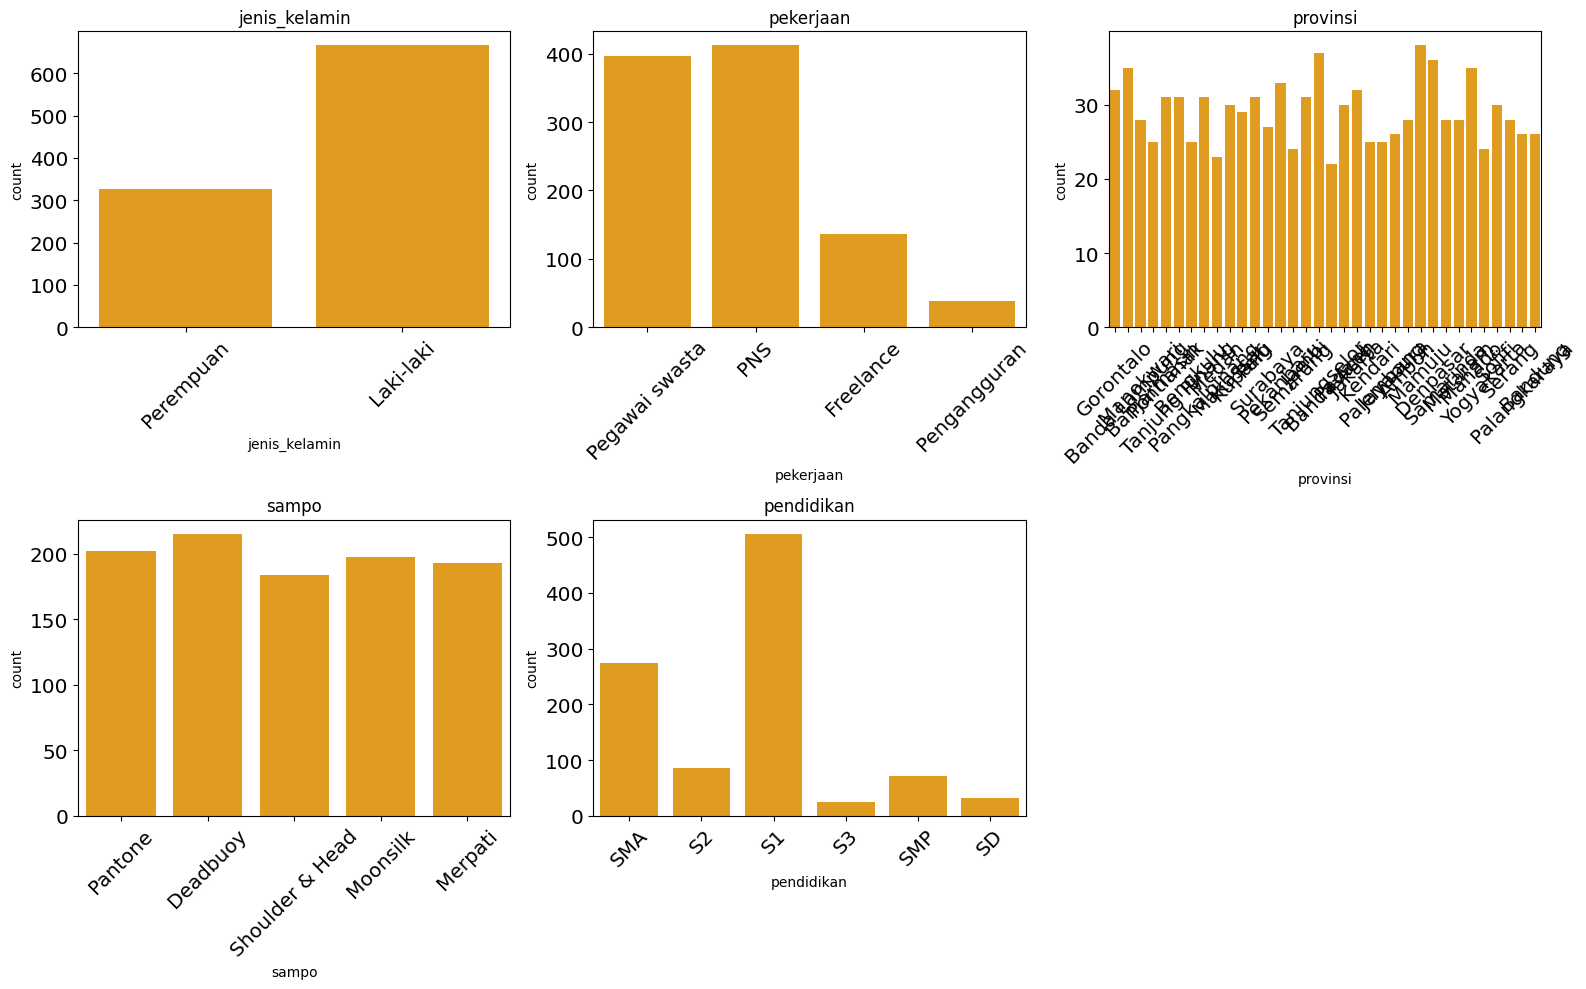

In [19]:
# count plot: categorical (cat)
plt.figure(figsize=(16, 10))

for i, col in enumerate(cat):
    plt.subplot(2, 3, i + 1)
    sns.countplot(
        data=df,
        x=col,
        color="orange"
    )
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

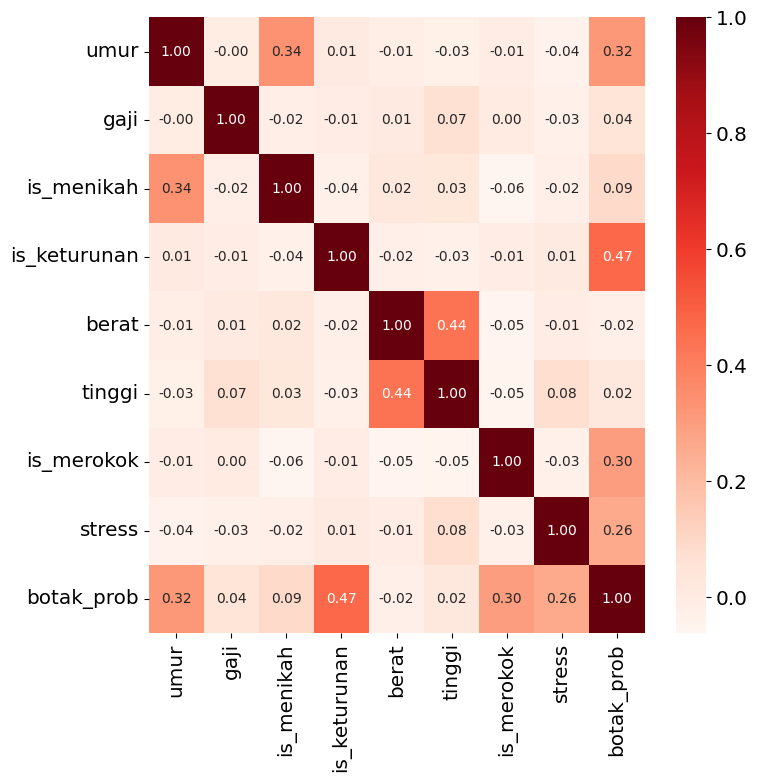

In [20]:
# bivariate analysis
# correlation heatmap 
plt.figure(figsize=(8, 8))
corr_matrix = df.select_dtypes(include="number").corr()

sns.heatmap(
    corr_matrix,
    cmap="Reds",
    annot=True,
    fmt=".2f"
)

plt.show()

In [21]:
# look at the target variable first (botak_prob), if the correlation values is higher than or equal to 0.5. It means that is high correlation
# if the 2 features variable has high correlation (>=0.5), that means it is biased values. Delete a biased feature.

<Figure size 1000x1000 with 0 Axes>

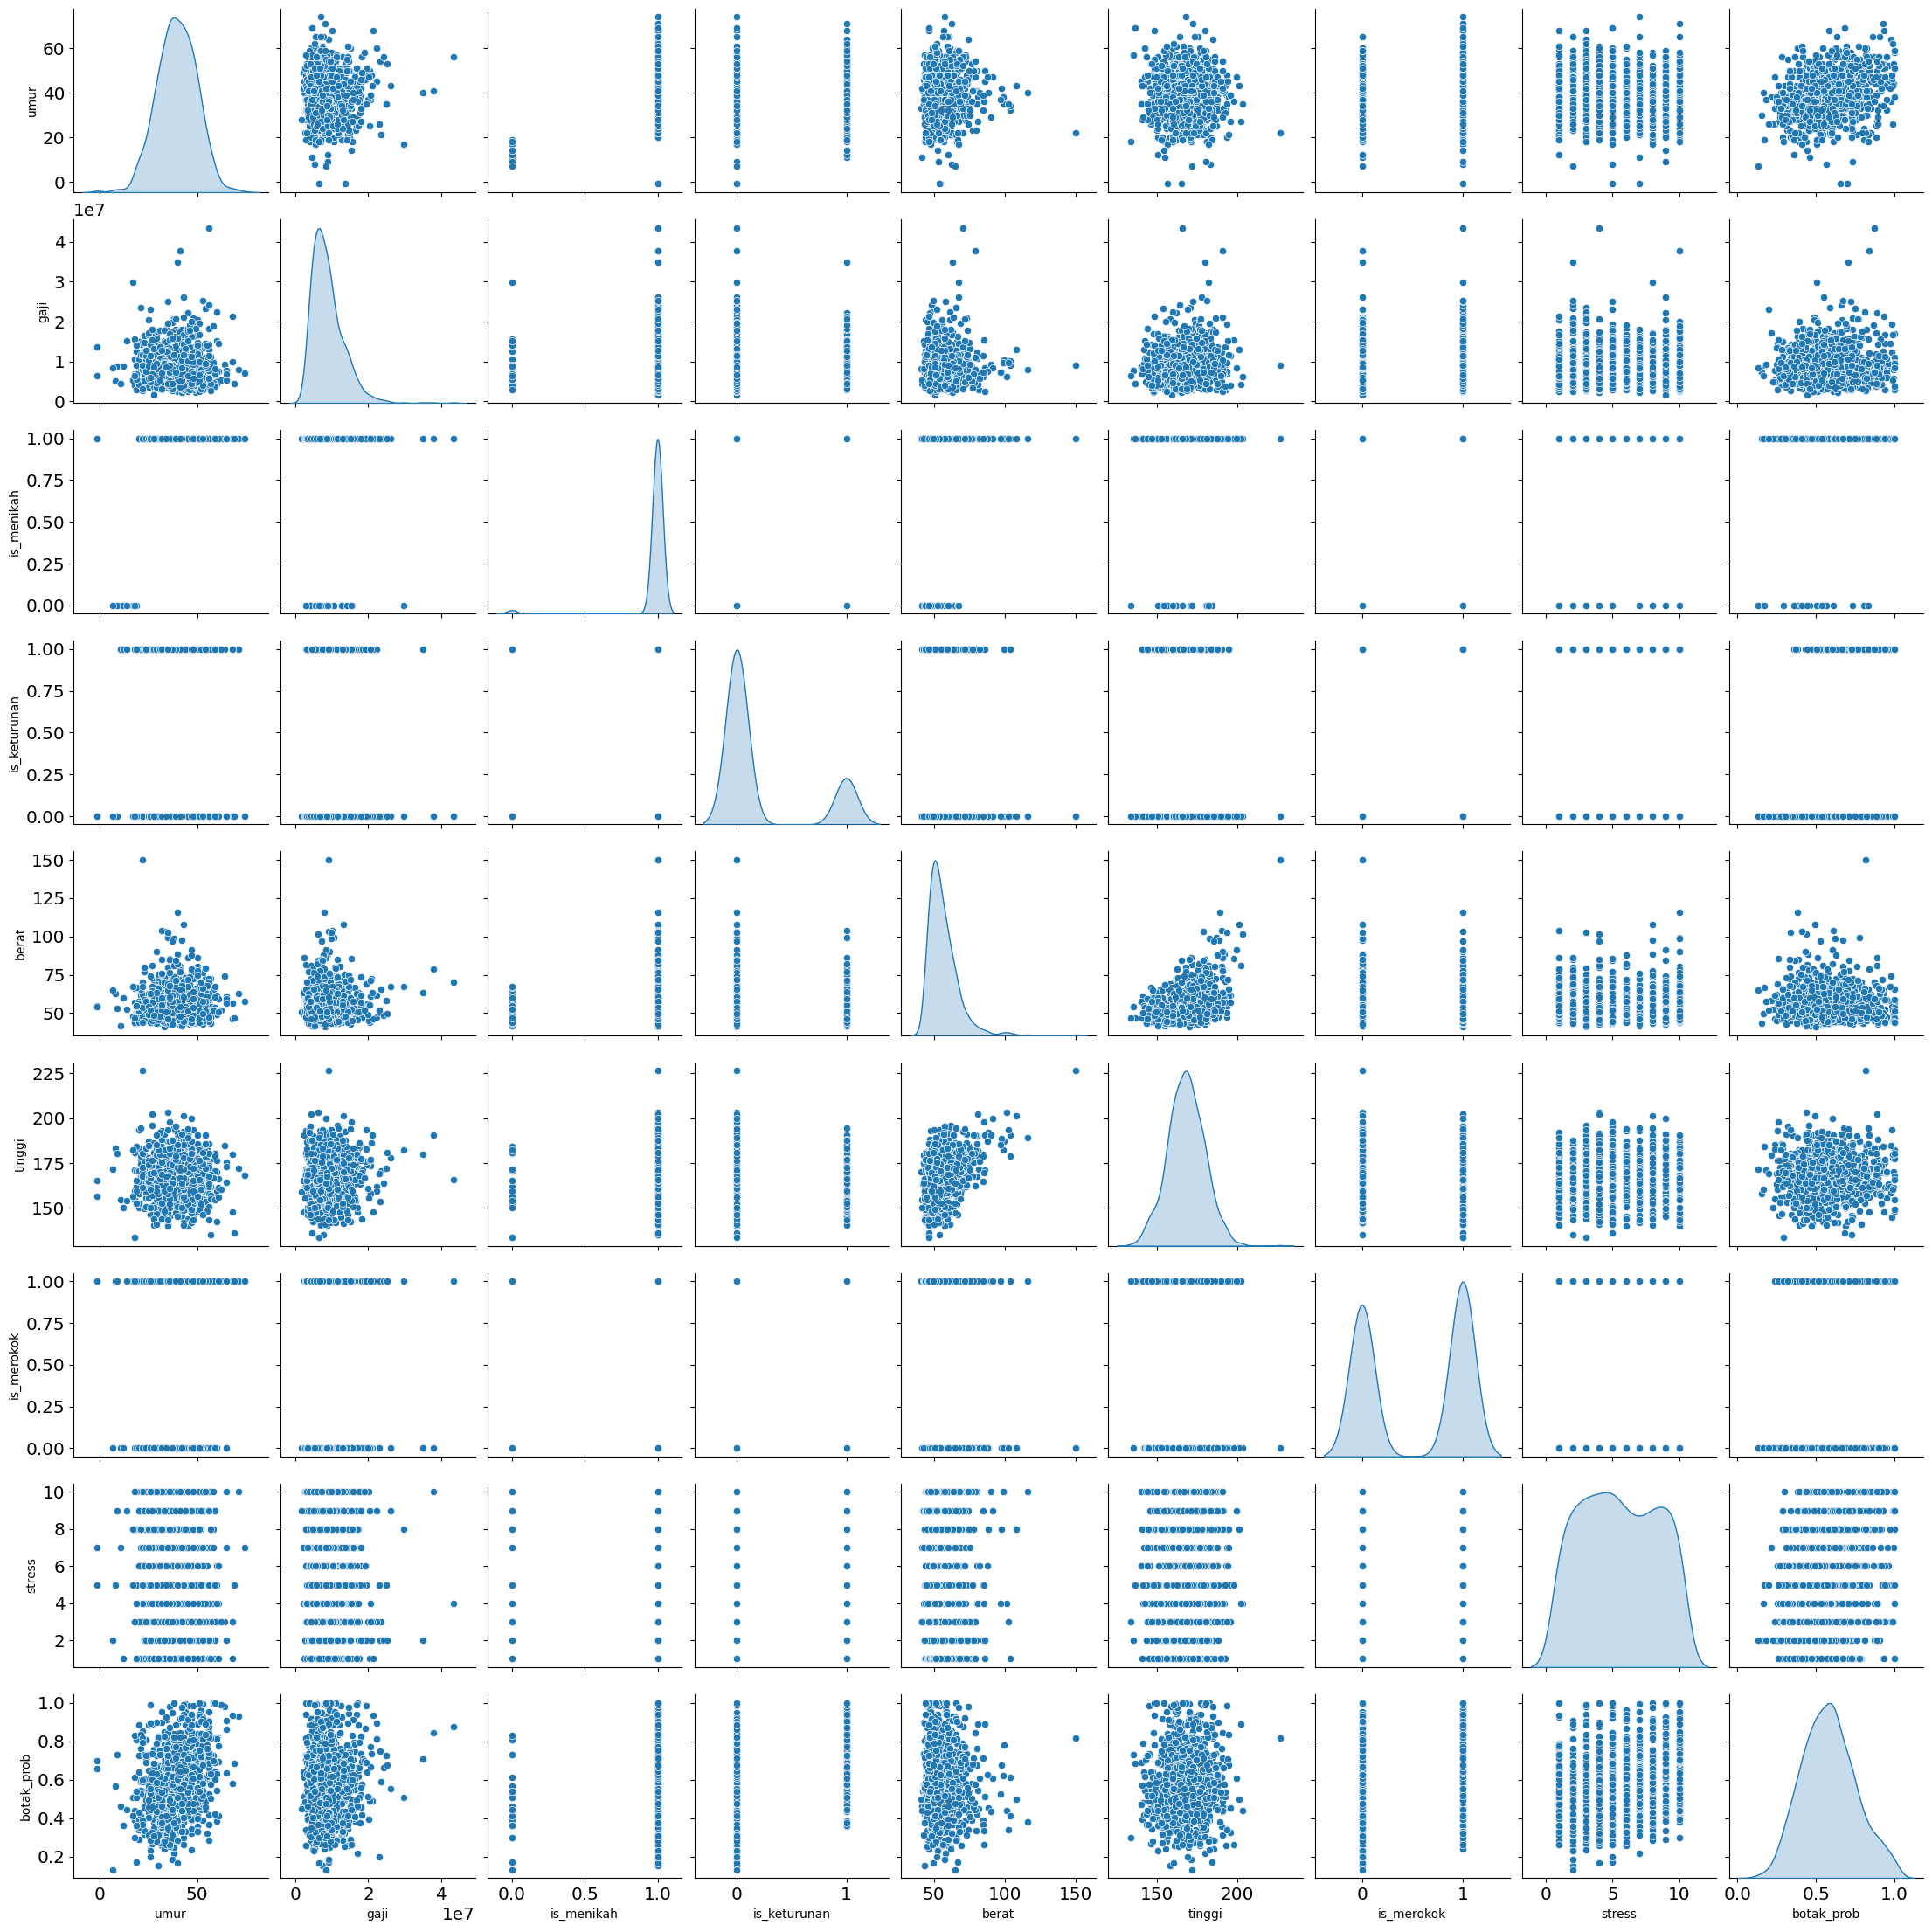

In [22]:
# pair plot
plt.figure(figsize=(10, 10))
sns.pairplot(
    df,
    diag_kind="kde"
)
plt.show()

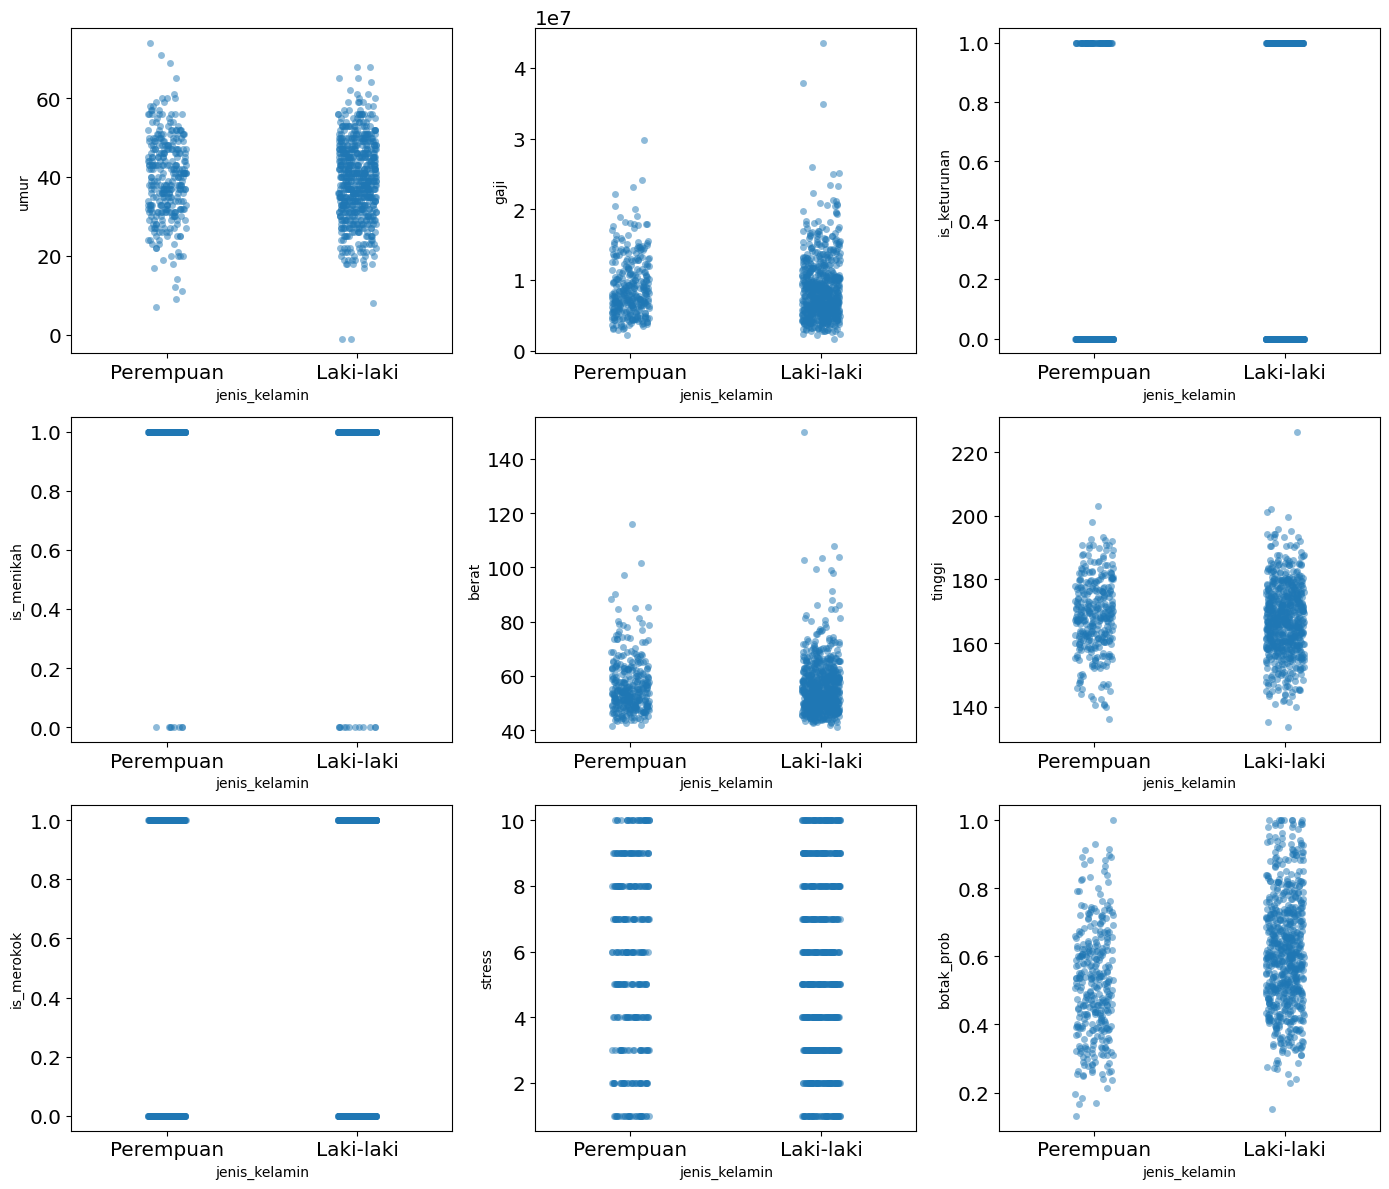

In [23]:
plt.figure(figsize=(14, 12))

for i, col in enumerate(num):
    plt.subplot(3, 3, i + 1)
    sns.stripplot(
        data=df,
        x="jenis_kelamin",
        y=col,
        jitter=True,
        alpha=0.5
    )

plt.tight_layout()
plt.show()

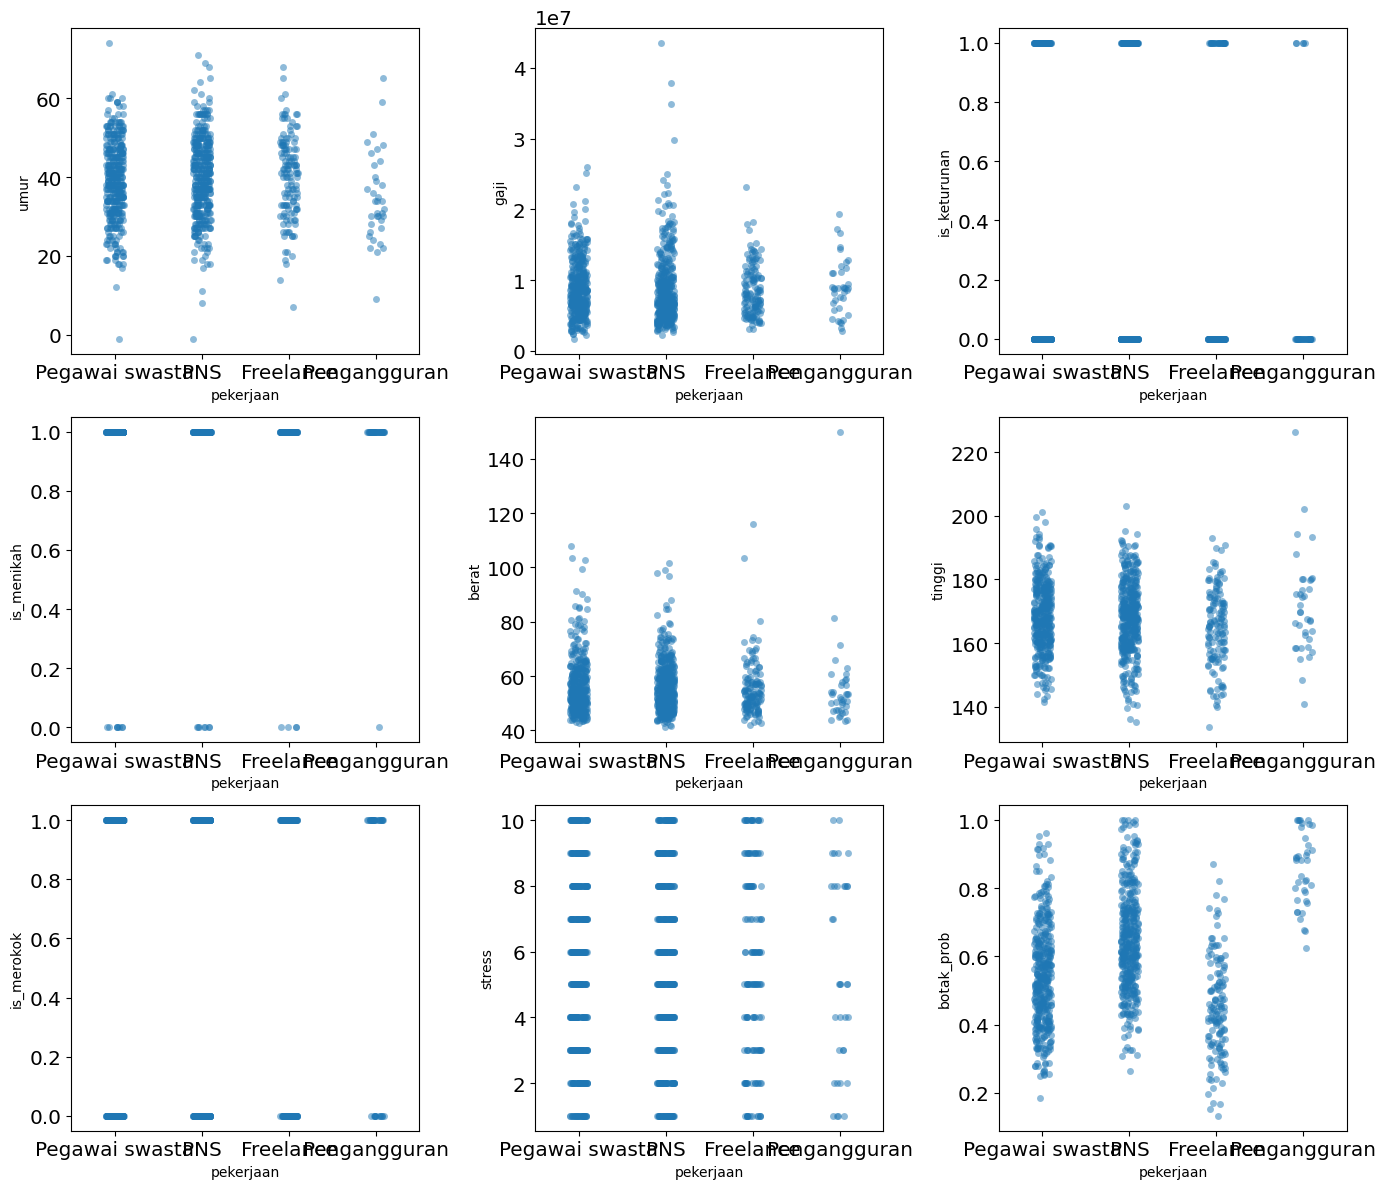

In [24]:
plt.figure(figsize=(14, 12))

for i, col in enumerate(num):
    plt.subplot(3, 3, i + 1)
    sns.stripplot(
        data=df,
        x="pekerjaan",
        y=col,
        jitter=True,
        alpha=0.5
    )

plt.tight_layout()
plt.show()

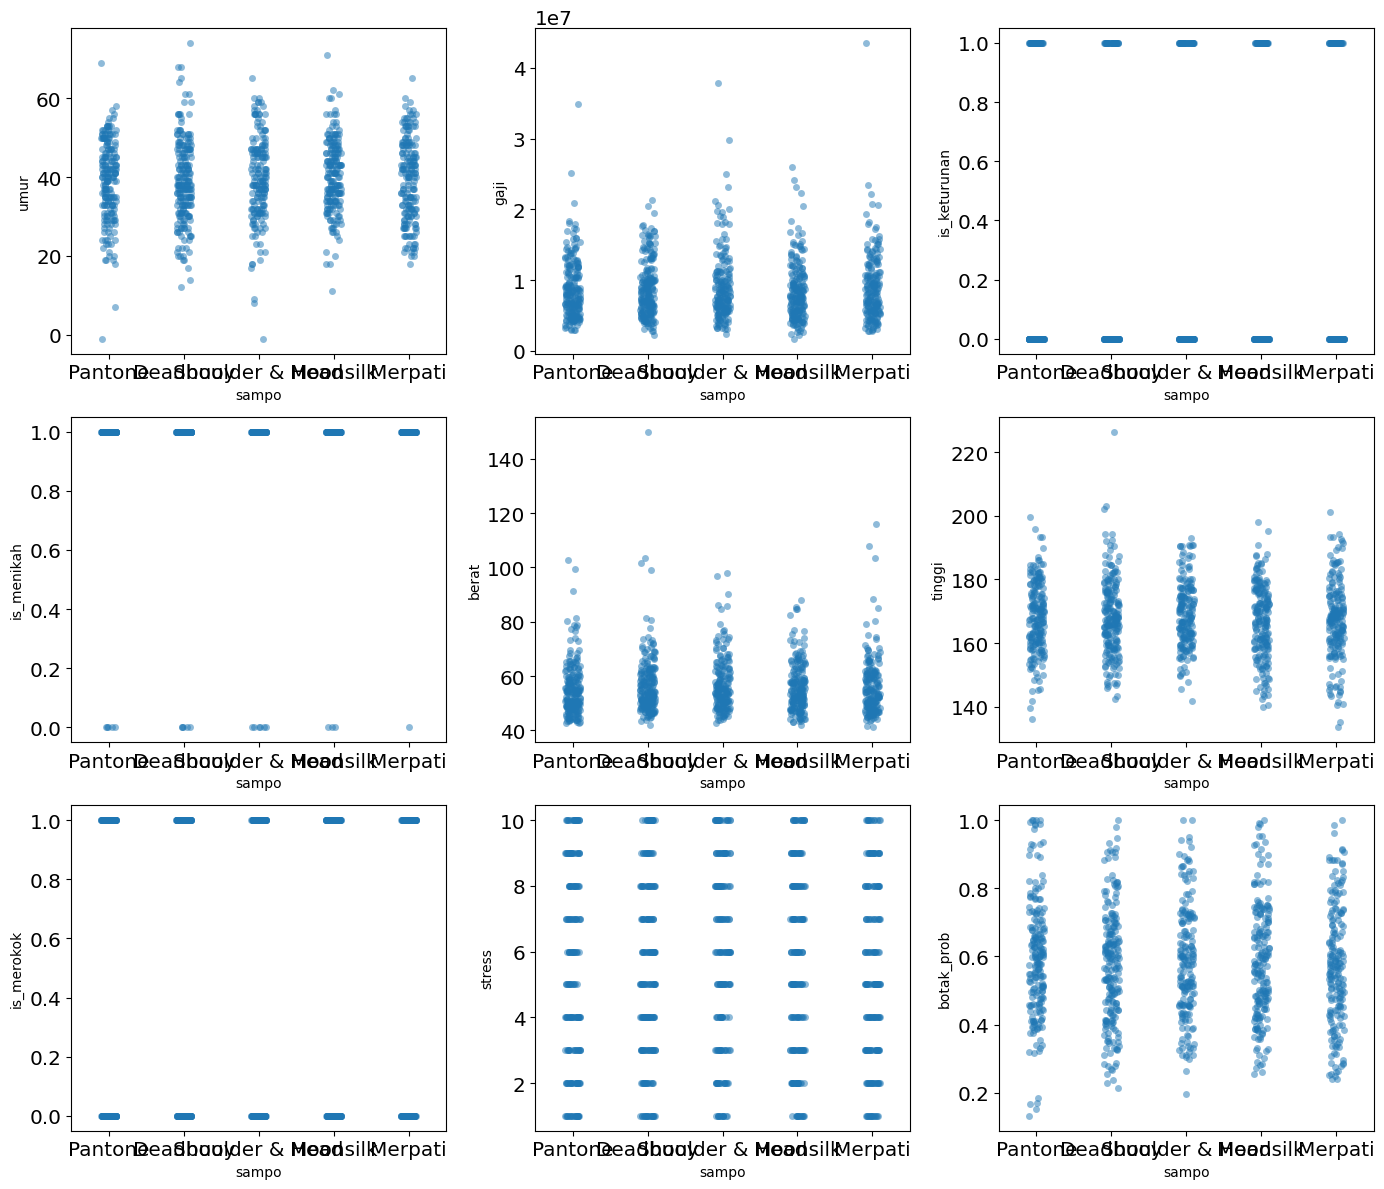

In [25]:
plt.figure(figsize=(14, 12))

for i, col in enumerate(num):
    plt.subplot(3, 3, i + 1)
    sns.stripplot(
        data=df,
        x="sampo",
        y=col,
        jitter=True,
        alpha=0.5
    )

plt.tight_layout()
plt.show()

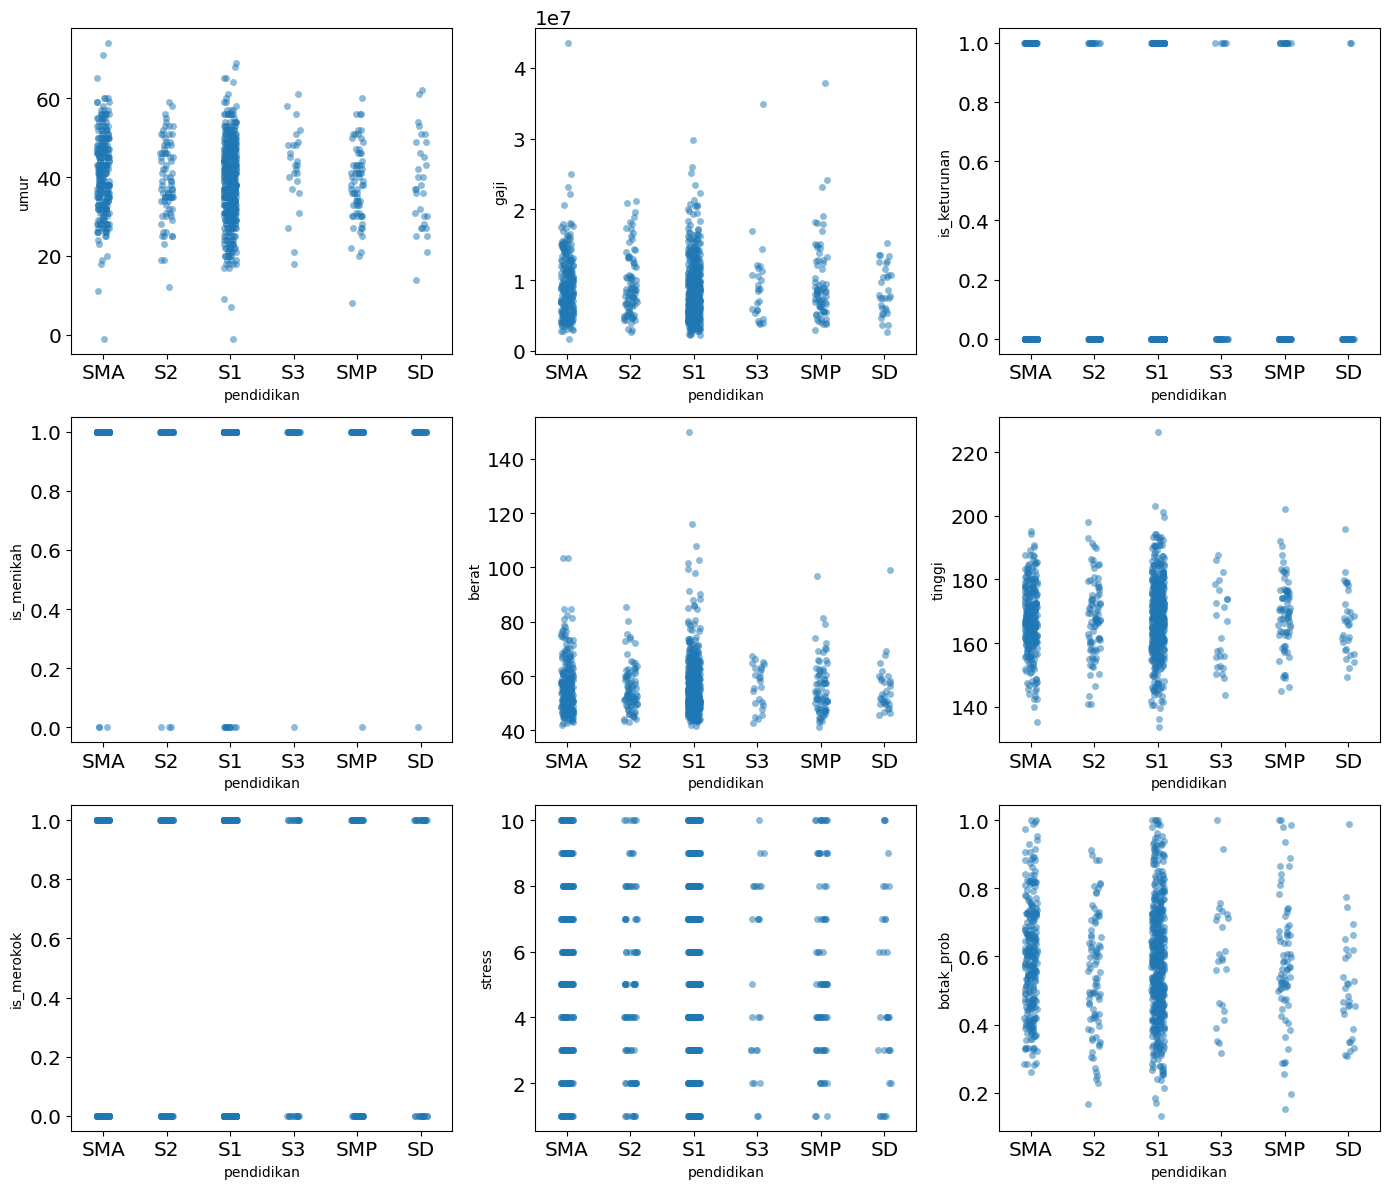

In [26]:
plt.figure(figsize=(14, 12))

for i, col in enumerate(num):
    plt.subplot(3, 3, i + 1)
    sns.stripplot(
        data=df,
        x="pendidikan",
        y=col,
        jitter=True,
        alpha=0.5
    )

plt.tight_layout()
plt.show()

## EDA Conclusion

Some things we find from this EDA dataset are:
- The data looks valid and there are no defects
- However, there is still empty/missing data, which must be taken care of during preprocessing
- There are some distributions that are slightly skewed, this must be remembered if we want to do something or use a model requires the assumption of a normal distribution
- Some features have a clear correlation with the target, they will be used
- Some features seem completely uncorrelated, they are best ignored or modified

## Excited Data Preparation

In [27]:
data1 = pd.read_csv("botak.csv")
data1.shape

(7917, 14)

In [28]:
data1.sample(10)

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
5960,52.0,Perempuan,Pegawai swasta,Padang,3.918239e+06,1.0,0.0,49.443337,151.087925,Deadbuoy,1.0,SMP,3.0,0.616692
7863,29.0,Laki-laki,Pegawai swasta,Makassar,8.844124e+06,1.0,0.0,48.519686,171.188100,Shoulder & Head,1.0,SMA,5.0,0.532553
2455,42.0,Laki-laki,Pegawai swasta,Semarang,6.823649e+06,1.0,0.0,46.613814,153.847308,Pantone,0.0,S2,1.0,0.335949
3360,43.0,Laki-laki,Pegawai swasta,Surabaya,1.521693e+07,1.0,0.0,56.680382,163.151078,Moonsilk,1.0,S1,5.0,0.552538
5838,49.0,Perempuan,PNS,Mamuju,4.559073e+06,1.0,1.0,54.967096,168.946626,Shoulder & Head,0.0,S1,7.0,0.778772
2080,39.0,Laki-laki,Pegawai swasta,Banjarmasin,1.110031e+07,1.0,0.0,56.298438,158.199064,Merpati,0.0,S2,6.0,0.429755
7839,38.0,Laki-laki,Freelance,Palangkaraya,2.627672e+07,NaN,0.0,61.154651,181.063426,Deadbuoy,0.0,S1,1.0,0.285597
1214,36.0,Laki-laki,Pegawai swasta,Pontianak,7.812973e+06,1.0,1.0,59.448094,174.449981,Merpati,0.0,SMA,8.0,0.623206
3444,34.0,Laki-laki,PNS,Pontianak,7.083790e+06,1.0,1.0,61.071668,168.272005,Moonsilk,0.0,S2,7.0,0.855874
4942,33.0,Laki-laki,PNS,Mamuju,6.364806e+06,1.0,0.0,62.487370,165.176765,Merpati,0.0,S1,3.0,0.427853


In [29]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7917 entries, 0 to 7916
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           7838 non-null   float64
 1   jenis_kelamin  7840 non-null   object 
 2   pekerjaan      7760 non-null   object 
 3   provinsi       7831 non-null   object 
 4   gaji           7843 non-null   float64
 5   is_menikah     7845 non-null   float64
 6   is_keturunan   7828 non-null   float64
 7   berat          7861 non-null   float64
 8   tinggi         7843 non-null   float64
 9   sampo          7858 non-null   object 
 10  is_merokok     7847 non-null   float64
 11  pendidikan     7847 non-null   object 
 12  stress         7853 non-null   float64
 13  botak_prob     7838 non-null   float64
dtypes: float64(9), object(5)
memory usage: 866.1+ KB


In [30]:
data1.isna().sum()

umur              79
jenis_kelamin     77
pekerjaan        157
provinsi          86
gaji              74
is_menikah        72
is_keturunan      89
berat             56
tinggi            74
sampo             59
is_merokok        70
pendidikan        70
stress            64
botak_prob        79
dtype: int64

In [31]:
data1.dropna(subset=["berat", "sampo", "stress", "jenis_kelamin", "gaji", "is_menikah", "tinggi", "is_merokok", "pendidikan"], inplace=True)
data1.isna().sum()

umur              72
jenis_kelamin      0
pekerjaan        143
provinsi          77
gaji               0
is_menikah         0
is_keturunan      85
berat              0
tinggi             0
sampo              0
is_merokok         0
pendidikan         0
stress             0
botak_prob        67
dtype: int64

In [32]:
# imputasi numerik
data1["umur"] = data1["umur"].fillna(data1["umur"].mean())
data1["is_keturunan"] = data1["is_keturunan"].fillna(0)
data1["botak_prob"] = data1["botak_prob"].fillna(data1["botak_prob"].median())

In [33]:
data1.isna().sum()

umur               0
jenis_kelamin      0
pekerjaan        143
provinsi          77
gaji               0
is_menikah         0
is_keturunan       0
berat              0
tinggi             0
sampo              0
is_merokok         0
pendidikan         0
stress             0
botak_prob         0
dtype: int64

In [34]:
# imputasi categorical
data1["pekerjaan"] = data1["pekerjaan"].fillna(data1["pekerjaan"].mode()[0])
data1["provinsi"] = data1["provinsi"].fillna(data1["provinsi"].mode()[0])

In [35]:
data1.isna().sum()

umur             0
jenis_kelamin    0
pekerjaan        0
provinsi         0
gaji             0
is_menikah       0
is_keturunan     0
berat            0
tinggi           0
sampo            0
is_merokok       0
pendidikan       0
stress           0
botak_prob       0
dtype: int64

In [36]:
print(data1.duplicated().sum())
data1.drop_duplicates(inplace=True)
print(data1.duplicated().sum())

75
0


In [42]:
# handle outlier
# use z-score
print(f"jumlah baris sebelum difilter: {len(data1)}")

filtered_entries = np.array([True] * len(data1))
for col in ["umur", "gaji", "tinggi", "berat"]:
    zscore = abs(stats.zscore(data1[col]))
    filtered_entries = (zscore < 3) & filtered_entries
data2 = data1[filtered_entries]

print(f"jumlah baris setelah difilter: {len(data2)}")

jumlah baris sebelum difilter: 7244
jumlah baris setelah difilter: 6973
